In [44]:
import pandas as pd
import re

In [55]:
# Parse all output files from input directory and concatenate them into a single DataFrame
def parse_output_files(directory):
    import os
    import glob

    # Find all xlsx files in the directory
    file_pattern = os.path.join(directory, '*.xls')
    files = glob.glob(file_pattern)

    # Exclude files that include _filtered in their names
    files = [f for f in files if '_filtered' not in os.path.basename(f)]

    # Read and concatenate all files into a single DataFrame
    dataframes = []
    for file in files:
        # Extract allele name from the filename using regex (allele names start with HLA-, e.g. HLA-A03_01

        match = re.search(r'HLA-[A-Z0-9_]+', os.path.basename(file))
        if match:
            allele_name = match.group(0)
            print(f"Processing file: {file} with allele name: {allele_name}")
        else:
            print(f"No allele name found in file: {file}")
            continue        
        df = pd.read_csv(file, sep='\t', header=1, low_memory=True)
        # Add a new column for the allele name
        df['allele'] = allele_name
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [56]:
df_pos = parse_output_files('/media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos')

Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos/683_positive.fasta@HLA-A03_01.xls with allele name: HLA-A03_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos/683_positive.fasta@HLA-A24_02.xls with allele name: HLA-A24_02
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos/683_positive.fasta@HLA-A26_01.xls with allele name: HLA-A26_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos/683_positive.fasta@HLA-B07_02.xls with allele name: HLA-B07_02
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos/683_positive.fasta@HLA-B08_01.xls with allele name: HLA-B08_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos/683_positive.fasta@HLA-B15_01.xls with allele name: HLA-B15_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitPos/683_positive.fasta@HLA-B27_05.xls with allele name: HLA-B27_05
Processing file: /media/onu

In [57]:
df_neg = parse_output_files('/media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg')

Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg/688_negative_3.fasta@HLA-B15_01.xls with allele name: HLA-B15_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg/688_negative_3.fasta@HLA-B27_05.xls with allele name: HLA-B27_05
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg/688_negative_3.fasta@HLA-B39_01.xls with allele name: HLA-B39_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg/688_negative_3.fasta@HLA-B40_01.xls with allele name: HLA-B40_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg/688_negative_3.fasta@HLA-B58_01.xls with allele name: HLA-B58_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg/688_negative_4.fasta@HLA-A01_01.xls with allele name: HLA-A01_01
Processing file: /media/onur/MORIA/experiments/2209_SevvalBatuhan/PeptitNeg/688_negative_4.fasta@HLA-A02_01.xls with allele name: HLA-A02_01
Processing fi

In [ ]:
df_pos['allergen'] = True
df_neg['allergen'] = False
# Combine positive and negative DataFrames
df_combined = pd.concat([df_pos, df_neg], ignore_index=True)
# Save the combined DataFrame to a new CSV file
df_combined.to_csv('/media/onur/MORIA/experiments/2209_SevvalBatuhan/combined_peptides.csv', index=False)
print("Combined DataFrame saved to /media/onur/MORIA/experiments/2209_SevvalBatuhan/combined_peptides.csv")

Combined DataFrame saved to /media/onur/MORIA/experiments/2209_SevvalBatuhan/combined_peptides.csv
   Pos     Peptide            ID       core       icore  EL-score  EL_Rank  \
0    0  MWSLMQAQVA  683_positive  MSLMQAQVA  MWSLMQAQVA    0.0000  66.2500   
1    1  WSLMQAQVAM  683_positive  SLMQAQVAM   SLMQAQVAM    0.0001  37.6667   
2    2  SLMQAQVAMV  683_positive  SLMQAQVMV  SLMQAQVAMV    0.0004  19.9123   
3    3  LMQAQVAMVV  683_positive  LMQAQVMVV  LMQAQVAMVV    0.0000  48.5000   
4    4  MQAQVAMVVA  683_positive  MQAQVMVVA  MQAQVAMVVA    0.0000  44.6667   

      Ave  NB      allele  allergen  
0  0.0000   0  HLA-A03_01      True  
1  0.0001   0  HLA-A03_01      True  
2  0.0004   0  HLA-A03_01      True  
3  0.0000   0  HLA-A03_01      True  
4  0.0000   0  HLA-A03_01      True  
Combined DataFrame shape: (17758368, 11)
Combined DataFrame columns: ['Pos', 'Peptide', 'ID', 'core', 'icore', 'EL-score', 'EL_Rank', 'Ave', 'NB', 'allele', 'allergen']
Number of unique alleles: 12


KeyError: 'peptide'

In [69]:
df_combined = pd.read_csv('/media/onur/MORIA/experiments/2209_SevvalBatuhan/combined_peptides.csv')
# Display the first few rows of the combined DataFrame
print(df_combined.head())

   Pos     Peptide            ID       core       icore  EL-score  EL_Rank  \
0    0  MWSLMQAQVA  683_positive  MSLMQAQVA  MWSLMQAQVA    0.0000  66.2500   
1    1  WSLMQAQVAM  683_positive  SLMQAQVAM   SLMQAQVAM    0.0001  37.6667   
2    2  SLMQAQVAMV  683_positive  SLMQAQVMV  SLMQAQVAMV    0.0004  19.9123   
3    3  LMQAQVAMVV  683_positive  LMQAQVMVV  LMQAQVAMVV    0.0000  48.5000   
4    4  MQAQVAMVVA  683_positive  MQAQVMVVA  MQAQVAMVVA    0.0000  44.6667   

      Ave  NB      allele  allergen  
0  0.0000   0  HLA-A03_01      True  
1  0.0001   0  HLA-A03_01      True  
2  0.0004   0  HLA-A03_01      True  
3  0.0000   0  HLA-A03_01      True  
4  0.0000   0  HLA-A03_01      True  


In [70]:
# Annonate each row based on EL_Rank column.
# If EL_Rank is less than 0.5, set 'annotation' to 'SB', if between 0.5 and 2 set to 'WB', otherwise set it to 'NB'
def annotate_rows(df):
    conditions = [
        (df['EL_Rank'] < 0.5),
        (df['EL_Rank'] >= 0.5) & (df['EL_Rank'] <= 2),
        (df['EL_Rank'] > 2)
    ]
    choices = ['SB', 'WB', 'NB']
    df['annotation'] = pd.Series(pd.Categorical(pd.cut(df['EL_Rank'], bins=[-1, 0.5, 2, float('inf')], labels=choices)))
    return df

In [71]:
df_combined = annotate_rows(df_combined)

In [72]:
# Drop duplicates based on 'Peptide', 'allele' columns
df_combined_no_duplicates = df_combined.drop_duplicates(subset=['Peptide', 'allele', 'allergen'])

In [75]:
# How many SB or WB rows are there in df_combined_no_duplicates for allergen peptides?
sb_count = df_combined_no_duplicates[(df_combined_no_duplicates['annotation'] == 'SB') & (df_combined_no_duplicates['allergen'])].shape[0]
wb_count = df_combined_no_duplicates[(df_combined_no_duplicates['annotation'] == 'WB') & (df_combined_no_duplicates['allergen'])].shape[0]
print(f"Number of SB allergen peptides: {sb_count}")
print(f"Number of WB allergen peptides: {wb_count}")
# Print percentage of SB and WB allergen peptides
total_allergen_count = df_combined_no_duplicates[df_combined_no_duplicates['allergen']].shape[0]
if total_allergen_count > 0:
    sb_percentage = (sb_count / total_allergen_count) * 100
    wb_percentage = (wb_count / total_allergen_count) * 100
    print(f"Percentage of SB allergen peptides: {sb_percentage:.2f}%")
    print(f"Percentage of WB allergen peptides: {wb_percentage:.2f}%")

Number of SB allergen peptides: 10202
Number of WB allergen peptides: 35230
Percentage of SB allergen peptides: 0.34%
Percentage of WB allergen peptides: 1.17%


In [76]:
# Do the same analysis for non-allergen peptides
non_allergen_sb_count = df_combined_no_duplicates[(df_combined_no_duplicates['annotation'] == 'SB') & (~df_combined_no_duplicates['allergen'])].shape[0]
non_allergen_wb_count = df_combined_no_duplicates[(df_combined_no_duplicates['annotation'] == 'WB') & (~df_combined_no_duplicates['allergen'])].shape[0]
print(f"Number of SB non-allergen peptides: {non_allergen_sb_count}")
print(f"Number of WB non-allergen peptides: {non_allergen_wb_count}")
# Print percentage of SB and WB non-allergen peptides
total_non_allergen_count = df_combined_no_duplicates[~df_combined_no_duplicates['allergen']].shape[0]
if total_non_allergen_count > 0:
    non_allergen_sb_percentage = (non_allergen_sb_count / total_non_allergen_count) * 100
    non_allergen_wb_percentage = (non_allergen_wb_count / total_non_allergen_count) * 100
    print(f"Percentage of SB non-allergen peptides: {non_allergen_sb_percentage:.2f}%")
    print(f"Percentage of WB non-allergen peptides: {non_allergen_wb_percentage:.2f}%")

Number of SB non-allergen peptides: 45086
Number of WB non-allergen peptides: 159406
Percentage of SB non-allergen peptides: 0.38%
Percentage of WB non-allergen peptides: 1.36%


In [86]:
# Do the same analysis within the context of individual alleles
def allele_analysis(df):
    allele_groups = df.groupby('allele')
    results = []
    
    for allele, group in allele_groups:
        sb_count = group[(group['annotation'] == 'SB') ].shape[0]
        wb_count = group[(group['annotation'] == 'WB') ].shape[0]
        total_allergen_count = group.shape[0]
        
        if total_allergen_count > 0:
            sb_percentage = (sb_count / total_allergen_count) * 100
            wb_percentage = (wb_count / total_allergen_count) * 100
        else:
            sb_percentage = wb_percentage = 0
        
        results.append({
            'allele': allele,
            'SB_count': sb_count,
            'WB_count': wb_count,
            'SB_percentage': sb_percentage,
            'WB_percentage': wb_percentage
        })
    
    return pd.DataFrame(results)

In [87]:
df_pos_allele_analysis = allele_analysis(df_combined_no_duplicates[df_combined_no_duplicates['allergen']])
df_neg_allele_analysis = allele_analysis(df_combined_no_duplicates[~df_combined_no_duplicates['allergen']])

In [88]:
df_pos_allele_analysis

allele  SB_count  WB_count  SB_percentage  WB_percentage
0   HLA-A01_01      1205      3715       0.479780       1.479154
1   HLA-A02_01       430      2148       0.171208       0.855242
2   HLA-A03_01      1003      3235       0.399352       1.288039
3   HLA-A24_02       858      3030       0.341619       1.206417
4   HLA-A26_01       987      2767       0.392981       1.101701
5   HLA-B07_02       965      3116       0.384222       1.240658
6   HLA-B08_01       732      2801       0.291451       1.115239
7   HLA-B15_01      1120      3550       0.445936       1.413459
8   HLA-B27_05       565      2249       0.224959       0.895456
9   HLA-B39_01       615      2436       0.244867       0.969911
10  HLA-B40_01       913      3248       0.363518       1.293215
11  HLA-B58_01       809      2935       0.322109       1.168592

In [89]:
df_neg_allele_analysis

allele  SB_count  WB_count  SB_percentage  WB_percentage
0   HLA-A01_01      3936     13520       0.401962       1.380722
1   HLA-A02_01      2115     11330       0.216087       1.157571
2   HLA-A03_01      4141     13309       0.423080       1.359762
3   HLA-A24_02      4318     15385       0.441164       1.571864
4   HLA-A26_01      3411     10836       0.348497       1.107099
5   HLA-B07_02      4848     14513       0.495314       1.482773
6   HLA-B08_01      3969     14610       0.405507       1.492684
7   HLA-B15_01      3926     14266       0.401420       1.458649
8   HLA-B27_05      3577     13474       0.365736       1.377670
9   HLA-B39_01      3181     11239       0.325246       1.149149
10  HLA-B40_01      3597     13068       0.367781       1.336158
11  HLA-B58_01      4067     13856       0.415340       1.415036

In [97]:
# Plot results in df_pos_allele_analysis and df_neg_allele_analysis, both SB and WB percentages
import matplotlib.pyplot as plt
import numpy as np


def plot_allele_analysis(df_pos, df_neg):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.bar(df_pos['allele'], df_pos['SB_percentage'], label='SB')
    plt.bar(df_pos['allele'], df_pos['WB_percentage'], bottom=df_pos['SB_percentage'], label='WB')
    plt.xlabel('Allele')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.title('SB and WB percentages for positive peptides')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.bar(df_neg['allele'], df_neg['SB_percentage'], label='SB')
    plt.bar(df_neg['allele'], df_neg['WB_percentage'], bottom=df_neg['SB_percentage'], label='WB')
    plt.xlabel('Allele')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.title('SB and WB percentages for negative peptides')
    plt.legend()

    plt.tight_layout()
    plt.show()

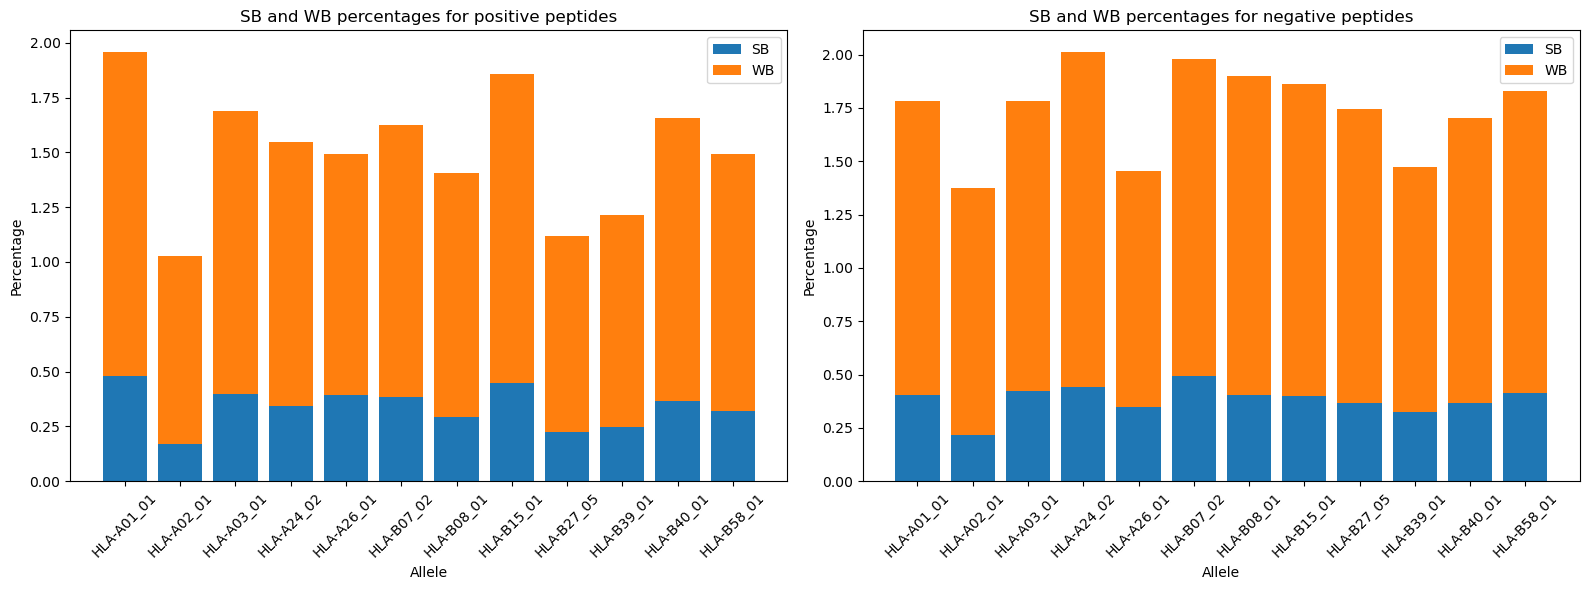

In [98]:
plot_allele_analysis(df_pos_allele_analysis, df_neg_allele_analysis)

In [99]:
# Compare alleles in terms of their binding behaviours between positive and negative peptides
def compare_alleles(df_pos, df_neg):
    combined = pd.merge(df_pos, df_neg, on='allele', suffixes=('_pos', '_neg'))
    combined['SB_diff'] = combined['SB_percentage_pos'] - combined['SB_percentage_neg']
    combined['WB_diff'] = combined['WB_percentage_pos'] - combined['WB_percentage_neg']
    
    return combined
df_comparison = compare_alleles(df_pos_allele_analysis, df_neg_allele_analysis)

Comparison of alleles based on binding behaviour:
        allele  SB_percentage_pos  WB_percentage_pos  SB_percentage_neg  \
0   HLA-A01_01           0.479780           1.479154           0.401962   
7   HLA-B15_01           0.445936           1.413459           0.401420   
4   HLA-A26_01           0.392981           1.101701           0.348497   
10  HLA-B40_01           0.363518           1.293215           0.367781   
2   HLA-A03_01           0.399352           1.288039           0.423080   
1   HLA-A02_01           0.171208           0.855242           0.216087   
9   HLA-B39_01           0.244867           0.969911           0.325246   
11  HLA-B58_01           0.322109           1.168592           0.415340   
3   HLA-A24_02           0.341619           1.206417           0.441164   
5   HLA-B07_02           0.384222           1.240658           0.495314   
6   HLA-B08_01           0.291451           1.115239           0.405507   
8   HLA-B27_05           0.224959           0.8954

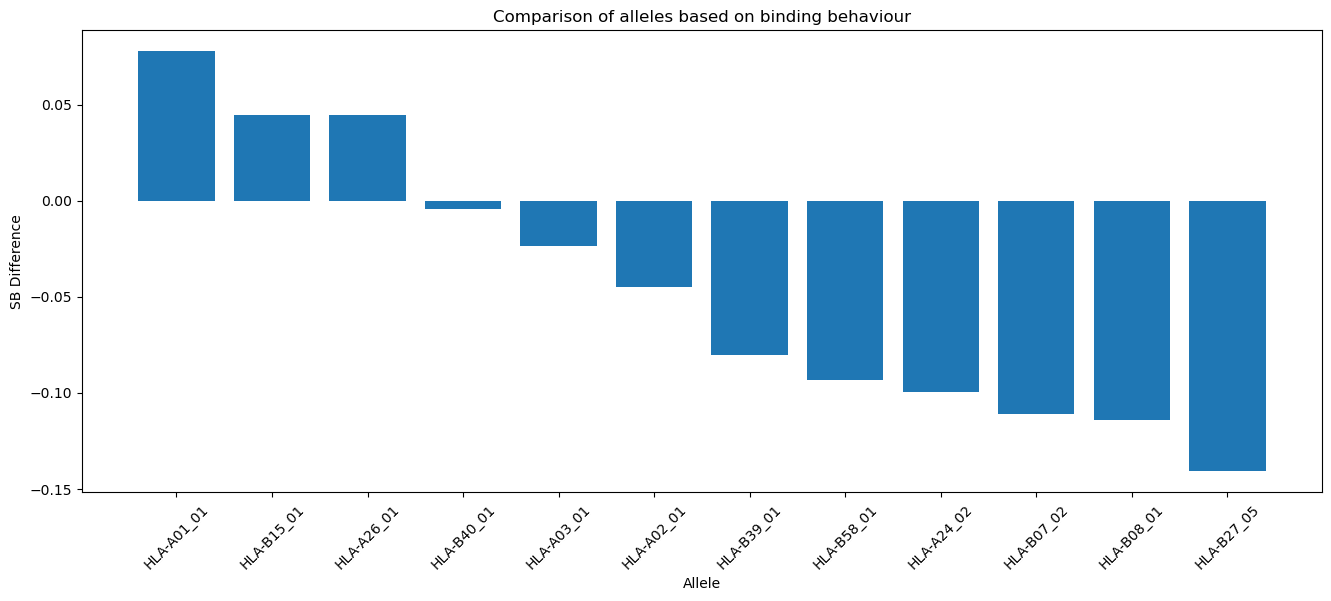

In [101]:
df_comparison = df_comparison.sort_values(by='SB_diff', ascending=False)
print("Comparison of alleles based on binding behaviour:")
print(df_comparison[['allele', 'SB_percentage_pos', 'WB_percentage_pos', 'SB_percentage_neg', 'WB_percentage_neg', 'SB_diff', 'WB_diff']])

# Plot the comparison results
plt.figure(figsize=(16, 6))
plt.bar(df_comparison['allele'], df_comparison['SB_diff'])
plt.xlabel('Allele')
plt.xticks(rotation=45)
plt.ylabel('SB Difference')
plt.title('Comparison of alleles based on binding behaviour')
plt.show()